## Verilerin yapay sinir ağları ile açıklanması

Gerekli paketlerin yüklenmesi

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

Verilerin okunması

In [3]:
df = pd.read_csv('hepsiemlak_cleaned.csv')

Değişken tiplerinin ayarlanması

In [4]:
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          6116 non-null   category
 1   district      6116 non-null   category
 2   neighborhood  6116 non-null   category
 3   room          6116 non-null   int64   
 4   living_room   6116 non-null   int64   
 5   area          6116 non-null   int64   
 6   age           6116 non-null   int64   
 7   floor         6116 non-null   int64   
 8   price         6116 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 334.8 KB
None


In [5]:
categorical_features = ['city', 'district', 'neighborhood']
numerical_features = ['room', 'living_room', 'area', 'age', 'floor']

Yapay sinir ağının oluşturulması

In [6]:
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(keras.optimizers.Adam(), loss='mse', metrics=['mae', 'mse'])
    return model

In [7]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

Modelin eğitilmesi

In [12]:
model = create_model(X_train_preprocessed.shape[1])
# history = model.fit(X_train_preprocessed, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[EarlyStopping(patience=10)])
history = model.fit(X_train_preprocessed, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 432894080.0000 - mae: 18103.3242 - mse: 432894080.0000 - val_loss: 396223040.0000 - val_mae: 17192.8789 - val_mse: 396223040.0000
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 331849312.0000 - mae: 15215.0264 - mse: 331849312.0000 - val_loss: 98022456.0000 - val_mae: 6348.4209 - val_mse: 98022456.0000
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 79211400.0000 - mae: 6122.5122 - mse: 79211400.0000 - val_loss: 62241812.0000 - val_mae: 5381.9497 - val_mse: 62241812.0000
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 58303532.0000 - mae: 5299.6348 - mse: 58303532.0000 - val_loss: 53018964.0000 - val_mae: 4962.8960 - val_mse: 53018964.0000
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 50408584.0000 - mae: 4919.7417 - mse: 50408584.0000 - val_loss: 47866816.0000 - val_mae: 4737.1694 - val_mse: 47866816.0000
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 4460333

Modelin değerlendirilmesi

In [13]:
test_results = model.evaluate(X_test_preprocessed, y_test, verbose=1)
print(f"Test Loss: {test_results[0]}, Test MAE: {test_results[1]}, Test MSE: {test_results[2]}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 47212064.0000 - mae: 4403.0776 - mse: 47212064.0000
Test Loss: 48199468.0, Test MAE: 4473.7587890625, Test MSE: 48199468.0


In [14]:
y_pred_nn = model.predict(X_test_preprocessed)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print('Neural Network Regression')
print('Mean Squared Error:', mse_nn)
print('Root Mean Squared Error:', rmse_nn)
print('R^2 Score:', r2_nn)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network Regression
Mean Squared Error: 48199467.28831068
Root Mean Squared Error: 6942.583617667898
R^2 Score: 0.5888713221012346


Öğrenme eğrilerinin kontrol edilmesi

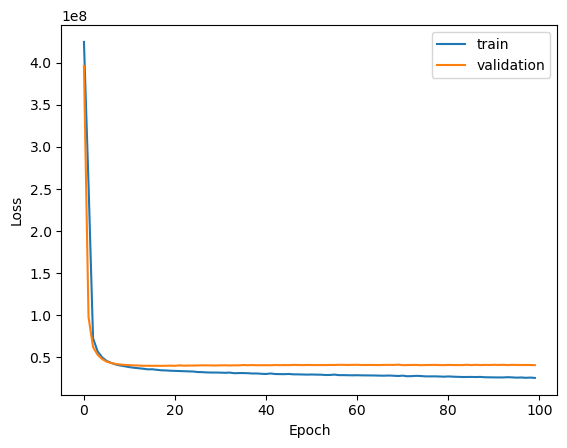

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()